# Performance Prediction: Version 1.0

## Setup

In [1]:
# libraries to deal with data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# libraries for machine learning
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# libraries to save/load models
import os
import joblib

## Loading Dataset

In [2]:
df = pd.read_csv("../data/Extended_Employee_Performance_and_Productivity_Data.csv", delimiter=",")
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


## Exploratory Data Analysis: Feature Selection

In [3]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


In [4]:
# get all column names
all_cols = df.columns
all_cols

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [5]:
# check NaN or null values
df.isna().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [6]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [7]:
# get column names with object datatype
object_cols = [col for col in all_cols if df[col].dtype == "object"]

# check cardinality (number of unique values in each column)
cardinality = list(map(lambda col: df[col].nunique(), object_cols))
d = dict(zip(object_cols, cardinality))
sorted(d.items(), key=lambda x: x[1])

[('Gender', 3),
 ('Education_Level', 4),
 ('Job_Title', 7),
 ('Department', 9),
 ('Hire_Date', 3650)]

The following columns are excluded from the model:

- **Employee_ID**: Unique identifier with no predictive value
- **Gender**: Removed due to ethical concerns and potential representation bias
- **Age**: Removed due to ethical concerns and potential age discrimination in salary recommendations
- **Department**: Redundant with `Job_Title`, which is more standardized across companies
- **Hire_Date**: Specific hire dates are not relevant for salary-based performance prediction; high cardinality makes encoding impractical
- **Years_At_Company**: Excluded to ensure the model applies to new hires and salary negotiations, where tenure may be zero or irrelevant
- **Promotions**: Removed because promotions are an outcome of past performance; promotions are unavailable for new hires
- **Employee_Satisfaction_Score**: Removed because satisfaction is an outcome of past performance; scores are unavailable for new hires
- **Resigned**: Outcome variable that would introduce data leakage

In [8]:
cols_to_drop = ["Employee_ID", "Gender", "Age", "Department", "Hire_Date", "Years_At_Company", "Promotions", "Employee_Satisfaction_Score", "Resigned"]
df = df.drop(columns=cols_to_drop)
df.head()

,Job_Title,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours
0,Specialist,High School,5,6750.0,33,32,22,2,0,14,66
1,Developer,High School,5,7500.0,34,34,13,14,100,12,61
2,Specialist,High School,3,5850.0,37,27,6,3,50,10,1
3,Analyst,Bachelor,2,4800.0,52,10,28,12,100,10,0
4,Analyst,Bachelor,2,4800.0,38,11,29,13,100,15,9


## Exploratory Data Analysis: Checking Performance Score

In [9]:
# check distribution
score_counts = df["Performance_Score"].value_counts()
score_counts

Performance_Score
1    20120
2    20013
3    19999
4    19940
5    19928
Name: count, dtype: int64

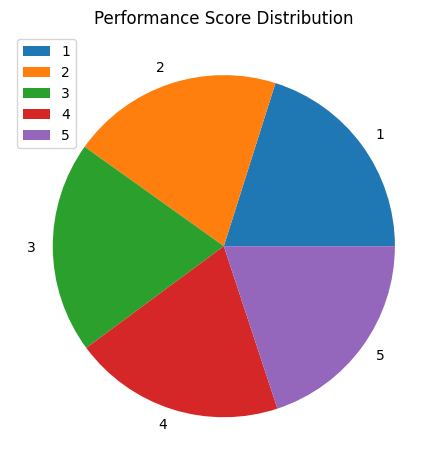

In [10]:
# visualize distribution
score_counts.plot(kind='pie', legend=True)
plt.title('Performance Score Distribution')
plt.ylabel('')  # to remove default label

plt.tight_layout()
plt.show()

Classes are relatively balanced.

## Exploratory Data Analysis: Checking Monthly Salary w.r.t Job Title

In [11]:
# check distribution
avg_salary_for_jobs = df.groupby("Job_Title")["Monthly_Salary"].mean()
avg_salary_for_jobs

Job_Title
Analyst       5195.820770
Consultant    7152.090077
Developer     6490.137372
Engineer      7799.324752
Manager       7798.324607
Specialist    5855.335355
Technician    4545.148757
Name: Monthly_Salary, dtype: float64

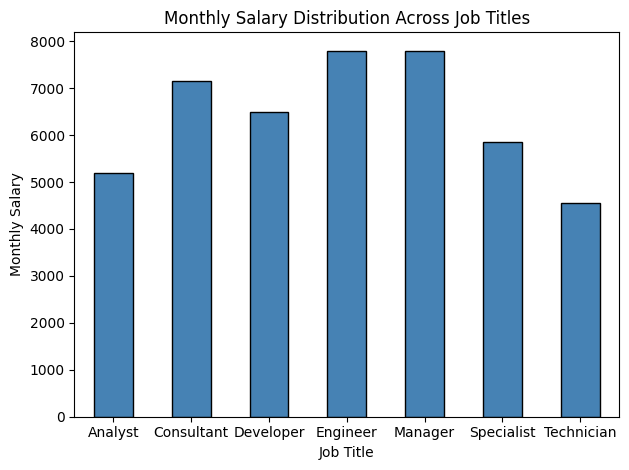

In [12]:
# visualize distribution
avg_salary_for_jobs.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Job Title')
plt.ylabel('Monthly Salary')
plt.title('Monthly Salary Distribution Across Job Titles')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Average pay varies across roles, with some offering higher compensation.

## Exploratory Data Analysis: Checking Monthly Salary w.r.t Education Level

In [13]:
# check distribution
avg_salary_for_edu = df.groupby("Education_Level")["Monthly_Salary"].mean()
avg_salary_for_edu

Education_Level
Bachelor       6398.421295
High School    6399.356752
Master         6417.448336
PhD            6431.548208
Name: Monthly_Salary, dtype: float64

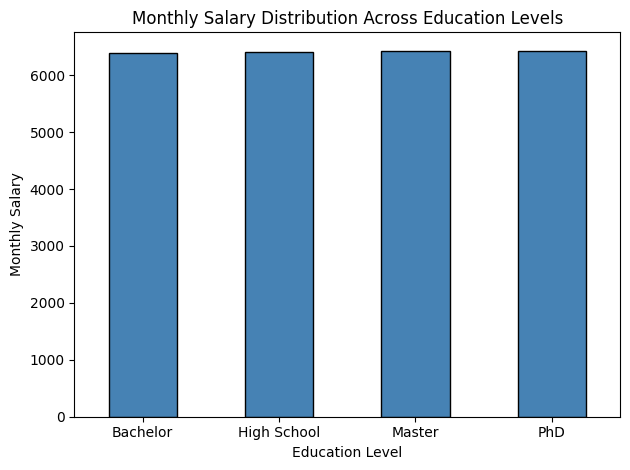

In [14]:
# visualize distribution
avg_salary_for_edu.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Education Level')
plt.ylabel('Monthly Salary')
plt.title('Monthly Salary Distribution Across Education Levels')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Exploratory Data Analysis: Checking Feature-Target Relationship

In [15]:
# get numeric column names
numeric_cols = list(df.select_dtypes(include=["number"]).columns)
numeric_cols

['Performance_Score',
 'Monthly_Salary',
 'Work_Hours_Per_Week',
 'Projects_Handled',
 'Overtime_Hours',
 'Sick_Days',
 'Remote_Work_Frequency',
 'Team_Size',
 'Training_Hours']

In [16]:
# get categorical column names
categorical_cols = list(set(all_cols) - set(numeric_cols) - set(cols_to_drop))
categorical_cols

['Job_Title', 'Education_Level']

In [17]:
# check correlations for numeric columns
df[numeric_cols].corr()['Performance_Score'].sort_values(ascending=False)

Performance_Score        1.000000
Monthly_Salary           0.510035
Sick_Days                0.002994
Training_Hours           0.002358
Remote_Work_Frequency    0.001733
Projects_Handled         0.000640
Overtime_Hours          -0.001312
Team_Size               -0.005174
Work_Hours_Per_Week     -0.005627
Name: Performance_Score, dtype: float64

In [18]:
# check ANOVA for group comparisons for categorical columns
for col in categorical_cols:  # for each column
    groups = []
    for val in df[col].unique():  # for each unique value in each column
        groups.append(df[df[col]==val]['Performance_Score'])

    f_stat, p_value = stats.f_oneway(*groups)
    print(f"\n{col}:")
    print(f"  ANOVA p-value: {p_value:.6f}")
    if p_value < 0.05:
        print(f"  - Statistically significant at 95% confidence")
        print(df.groupby(col)['Performance_Score'].mean())  # show group means
    else:
        print(f"  - Not statistically significant at 95% confidence")


Job_Title:
  ANOVA p-value: 0.537257
  - Not statistically significant at 95% confidence

Education_Level:
  ANOVA p-value: 0.071239
  - Not statistically significant at 95% confidence


## Data Preprocessing: Data Splitting

To prevent data leakage, the dataset must be split into training and test sets before fitting any encoders or scalers. This ensures that information from the test set does not influence the training process.

In [19]:
# separate features and target
target_col = ["Performance_Score"]
if sorted(list(set(numeric_cols + categorical_cols) - set(target_col))) == sorted(list(set(df.columns) - set(target_col))):
    features_col = list(set(df.columns) - set(target_col))
    X = df[features_col]
    y = df[target_col]
else:
    print("There is a mismatch in columns")

In [20]:
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Preprocessing: Encoding Categorical Variables as Numeric

There are two categorical columns to be transformed into numeric columns through ordinal encoding or one-hot encoding.

In [21]:
print(X_train['Education_Level'].unique())

['Bachelor' 'Master' 'High School' 'PhD']


The `Education_Level` column shows a clear ordinal relationship, as the categories represent increasing education level (High School → Bachelor → Master → PhD). Therefore, it is encoded using ordinal encoding. 

In [22]:
# get ordinal column names
ordinal_cols = ['Education_Level']

# define the correct order
education_order = [['High School', 'Bachelor', 'Master', 'PhD']]

In [23]:
print((X_train['Job_Title'].unique()))

['Technician' 'Developer' 'Manager' 'Consultant' 'Specialist' 'Analyst'
 'Engineer']


The `Job_Title` column contains multiple categorical values with no natural order. Encoding them as ordinal values would introduce artificial relationships between categories, so they are encoded using one-hot (dummy) encoding.

In [24]:
# get one-hot column names
onehot_cols = ['Job_Title']

The `Performance_Score` column is the target variable with five categories (1–5). For modeling, these labels must be encoded to a zero-based numerical format (0–4).

In [25]:
# label encoding
label_encoder = LabelEncoder()
label_y_train = label_encoder.fit_transform(y_train.values.ravel())
label_y_test = label_encoder.transform(y_test.values.ravel())

# recovert to original dtype
label_y_train = pd.Series(label_y_train)
label_y_test = pd.Series(label_y_test)

## Data Preprocessing: Creating a Column Transformer

This is an object made to accept the dataset and transform it on the fly to produce the encoded and scaled features ready for machine learning models. It includes the standard scaler for numeric columns, the ordinal encoder for ordinal columns, and the one-hot encoder for one-hot columns.

The benefit of using this instead of manual scaling or encoding process for each column type is that it handles all transformations in a single, consistent operation, ensures proper train/test separation (fits only on training data), integrates seamlessly with sklearn pipelines for easy model training and grid search, and reduces code complexity while minimizing errors.

The `remainder` parameter is used to specify how to handle columns that are not explicitly listed in the transformers. It is set to `'passthrough'` to keep any unlisted columns in their original form without transformation. Alternatively, it can be set to `'drop'` to exclude unlisted columns from the output.

In [26]:
# to verify
len(features_col)

10

In [27]:
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), list(set(numeric_cols) - set(target_col))),  # all numeric columns except the target
        ('ordinal', OrdinalEncoder(categories=education_order), ordinal_cols),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_cols),
    ],
    remainder='passthrough'
)

preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('ordinal', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``featur

## Model: Selection Rationale

Five models are selected for performance prediction:

1. **Logistic Regression**: A baseline model offering interpretability through coefficient analysis, useful for understanding relationships between salary, features, and performance categories.

2. **Ridge Classifier**: A regularized linear classification model that handles multicollinearity and prevents overfitting through L2 regularization, providing a more robust baseline than standard logistic regression.

3. **Random Forest Classifier**: An ensemble method that reduces overfitting through multiple trees. It handles feature interactions well and provides feature importance, making it suitable for identifying key performance drivers.

4. **Gradient Boosting Classifier**: A boosting algorithm that sequentially builds models to correct previous errors, effective at capturing complex non-linear relationships between salary, work factors, and performance categories.

5. **XGBoost Classifier**: An optimized gradient boosting algorithm with built-in regularization and efficient implementation. It typically delivers high predictive performance and is well-suited for tabular data with mixed feature types, especially effective for multiclass classification tasks.

These models represent different approaches (linear, bagging, and boosting), enabling comprehensive comparison for robust performance prediction.

In [28]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Classifier': RidgeClassifier(alpha=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                             objective='multi:softprob',  # return probabilities
                             num_class=5,
                             eval_metric='mlogloss'  # 'mlogloss' for multiclass
                            )
}

## Model: Cross-Validation
Cross-validation provides a robust performance estimate by splitting training data into multiple folds, using each fold for both training and validation. This gives a more reliable estimate than a single train-test split.

Cross-validation should be performed **before fitting the model**.

In [29]:
cv_results = {}

# perform regular 5-fold cross validation for each model
for name, model in models.items():
    # create pipeline for each model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # cross-validation
    cv_scores = cross_val_score(pipeline, X_train, label_y_train, cv=5, scoring='accuracy', n_jobs=-1)
    
    cv_results[name] = {
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std(),
        'cv_scores': cv_scores
    }
    
    print(f"\n{name}:")
    print(f"  average accuracy (5-fold cv): {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Logistic Regression:
  average accuracy (5-fold cv): 1.0000 (+/- 0.0000)

Ridge Classifier:
  average accuracy (5-fold cv): 0.4667 (+/- 0.0081)

Random Forest:
  average accuracy (5-fold cv): 1.0000 (+/- 0.0000)

Gradient Boosting:
  average accuracy (5-fold cv): 1.0000 (+/- 0.0000)

XGBoost:
  average accuracy (5-fold cv): 1.0000 (+/- 0.0000)


It appears that 4 out of 5 models achieve 100% accuracy. This suggests possible overfitting, which may be caused by data leakage or issues with the dataset itself (for example, a synthetic dataset with highly predictable patterns).

## Model: Identifying Overfitting

In [30]:
features_col

['Overtime_Hours',
 'Job_Title',
 'Education_Level',
 'Sick_Days',
 'Projects_Handled',
 'Training_Hours',
 'Monthly_Salary',
 'Work_Hours_Per_Week',
 'Remote_Work_Frequency',
 'Team_Size']

These features look reasonable for predicting performance.

In [31]:
# check if the dataset (all feature combinations) is deterministic
unique_mapping = df.groupby(features_col)['Performance_Score'].nunique()
print(f"total unique combinations: {len(unique_mapping)}")
print(f"number of times the same feature combination has different Performance_Scores: {(unique_mapping > 1).sum()}")
print(f"percentage where same features always produce same Performance_Score: {(unique_mapping == 1).sum() / len(unique_mapping) * 100:.2f}%")

total unique combinations: 100000
number of times the same feature combination has different Performance_Scores: 0
percentage where same features always produce same Performance_Score: 100.00%


The dataset contains 100,000 unique feature combinations (one per row). When all features are considered together, each unique combination maps to exactly one `Performance_Score`, making the dataset 100% deterministic. This occurs because **every row has a unique combination of all features**.

This is **not typical in real-world prediction scenarios because models must generalize to unseen feature combinations**. In practice, real-world data shows variation where identical feature combinations can produce different outcomes due to unmeasured factors or inherent randomness.

However, when only a subset of features is considered, multiple rows can share the same combination of those features but have different `Performance_Scores`, making it non-deterministic for that subset. This reflects more realistic prediction scenarios where models learn patterns from data with inherent variability.

In [32]:
# check if certain feature is deterministic
for chosen_features_col in features_col:
    temp_df = df[[chosen_features_col]].copy()
    temp_df['Performance_Score'] = df['Performance_Score'].values
    
    unique_mapping = temp_df.groupby([chosen_features_col])['Performance_Score'].nunique()
    print(f"\ncurrent features: {chosen_features_col}")
    print(f"total unique combinations: {len(unique_mapping)}")
    print(f"number of times the same feature combination has different Performance_Scores: {(unique_mapping > 1).sum()}")
    print(f"percentage where same features always produce same Performance_Score: {(unique_mapping == 1).sum() / len(unique_mapping) * 100:.2f}%")


current features: Overtime_Hours
total unique combinations: 30
number of times the same feature combination has different Performance_Scores: 30
percentage where same features always produce same Performance_Score: 0.00%

current features: Job_Title
total unique combinations: 7
number of times the same feature combination has different Performance_Scores: 7
percentage where same features always produce same Performance_Score: 0.00%

current features: Education_Level
total unique combinations: 4
number of times the same feature combination has different Performance_Scores: 4
percentage where same features always produce same Performance_Score: 0.00%

current features: Sick_Days
total unique combinations: 15
number of times the same feature combination has different Performance_Scores: 15
percentage where same features always produce same Performance_Score: 0.00%

current features: Projects_Handled
total unique combinations: 50
number of times the same feature combination has different 

When all 10 features are considered together, the dataset is 100% deterministic. But, when individual features are tested alone:
- `Monthly_Salary`: 92.86% deterministic (most predictive single feature)
- All other single features: 0% deterministic

This indicates that `Monthly_Salary` alone has strong predictive power, while other features require combinations to be meaningful.

In [33]:
# check if certain random feature combinations is deterministic
chosen_features_col = [
    'Remote_Work_Frequency',
    'Training_Hours',
    'Education_Level',
    'Sick_Days',
    'Team_Size',
    'Overtime_Hours',
    # 'Monthly_Salary',
    'Projects_Handled',
    'Work_Hours_Per_Week',
    'Job_Title'
]
temp_df = df[chosen_features_col].copy()
temp_df['Performance_Score'] = df['Performance_Score'].values

unique_mapping = temp_df.groupby(chosen_features_col)['Performance_Score'].nunique()
print(f"current features: {chosen_features_col}")
print(f"total unique combinations: {len(unique_mapping)}")
print(f"number of times the same feature combination has different Performance_Scores: {(unique_mapping > 1).sum()}")
print(f"percentage where same features always produce same Performance_Score: {(unique_mapping == 1).sum() / len(unique_mapping) * 100:.2f}%")

current features: ['Remote_Work_Frequency', 'Training_Hours', 'Education_Level', 'Sick_Days', 'Team_Size', 'Overtime_Hours', 'Projects_Handled', 'Work_Hours_Per_Week', 'Job_Title']
total unique combinations: 100000
number of times the same feature combination has different Performance_Scores: 0
percentage where same features always produce same Performance_Score: 100.00%


In [34]:
# check if certain random feature combinations is deterministic
chosen_features_col = [
    # 'Remote_Work_Frequency',
    'Training_Hours',
    'Education_Level',
    # 'Sick_Days',
    'Team_Size',
    # 'Overtime_Hours',
    # 'Monthly_Salary',
    'Projects_Handled',
    'Work_Hours_Per_Week',
    'Job_Title'
]
temp_df = df[chosen_features_col].copy()
temp_df['Performance_Score'] = df['Performance_Score'].values

unique_mapping = temp_df.groupby(chosen_features_col)['Performance_Score'].nunique()
print(f"current features: {chosen_features_col}")
print(f"total unique combinations: {len(unique_mapping)}")
print(f"number of times the same feature combination has different Performance_Scores: {(unique_mapping > 1).sum()}")
print(f"percentage where same features always produce same Performance_Score: {(unique_mapping == 1).sum() / len(unique_mapping) * 100:.2f}%")

current features: ['Training_Hours', 'Education_Level', 'Team_Size', 'Projects_Handled', 'Work_Hours_Per_Week', 'Job_Title']
total unique combinations: 99931
number of times the same feature combination has different Performance_Scores: 53
percentage where same features always produce same Performance_Score: 99.95%


In [35]:
# check if certain random feature combinations is deterministic
chosen_features_col = [
    # 'Remote_Work_Frequency',
    # 'Training_Hours',
    'Education_Level',
    # 'Sick_Days',
    'Team_Size',
    # 'Overtime_Hours',
    # 'Monthly_Salary',
    'Projects_Handled',
    'Work_Hours_Per_Week',
    'Job_Title'
]
temp_df = df[chosen_features_col].copy()
temp_df['Performance_Score'] = df['Performance_Score'].values

unique_mapping = temp_df.groupby(chosen_features_col)['Performance_Score'].nunique()
print(f"current features: {chosen_features_col}")
print(f"total unique combinations: {len(unique_mapping)}")
print(f"number of times the same feature combination has different Performance_Scores: {(unique_mapping > 1).sum()}")
print(f"percentage where same features always produce same Performance_Score: {(unique_mapping == 1).sum() / len(unique_mapping) * 100:.2f}%")

current features: ['Education_Level', 'Team_Size', 'Projects_Handled', 'Work_Hours_Per_Week', 'Job_Title']
total unique combinations: 91760
number of times the same feature combination has different Performance_Scores: 6250
percentage where same features always produce same Performance_Score: 93.19%


In [36]:
# check if certain random feature combinations is deterministic
chosen_features_col = [
    # 'Remote_Work_Frequency',
    # 'Training_Hours',
    'Education_Level',
    # 'Sick_Days',
    'Team_Size',
    # 'Overtime_Hours',
    # 'Monthly_Salary',
    'Projects_Handled',
    # 'Work_Hours_Per_Week',
    'Job_Title'
]
temp_df = df[chosen_features_col].copy()
temp_df['Performance_Score'] = df['Performance_Score'].values

unique_mapping = temp_df.groupby(chosen_features_col)['Performance_Score'].nunique()
print(f"current features: {chosen_features_col}")
print(f"total unique combinations: {len(unique_mapping)}")
print(f"number of times the same feature combination has different Performance_Scores: {(unique_mapping > 1).sum()}")
print(f"percentage where same features always produce same Performance_Score: {(unique_mapping == 1).sum() / len(unique_mapping) * 100:.2f}%")

current features: ['Education_Level', 'Team_Size', 'Projects_Handled', 'Job_Title']
total unique combinations: 22664
number of times the same feature combination has different Performance_Scores: 17569
percentage where same features always produce same Performance_Score: 22.48%


In [37]:
# check if certain random feature combinations is deterministic
chosen_features_col = [
    # 'Remote_Work_Frequency',
    # 'Training_Hours',
    'Education_Level',
    # 'Sick_Days',
    'Team_Size',
    # 'Overtime_Hours',
    # 'Monthly_Salary',
    # 'Projects_Handled',
    'Work_Hours_Per_Week',
    'Job_Title'
]
temp_df = df[chosen_features_col].copy()
temp_df['Performance_Score'] = df['Performance_Score'].values

unique_mapping = temp_df.groupby(chosen_features_col)['Performance_Score'].nunique()
print(f"current features: {chosen_features_col}")
print(f"total unique combinations: {len(unique_mapping)}")
print(f"number of times the same feature combination has different Performance_Scores: {(unique_mapping > 1).sum()}")
print(f"percentage where same features always produce same Performance_Score: {(unique_mapping == 1).sum() / len(unique_mapping) * 100:.2f}%")

current features: ['Education_Level', 'Team_Size', 'Work_Hours_Per_Week', 'Job_Title']
total unique combinations: 15188
number of times the same feature combination has different Performance_Scores: 12867
percentage where same features always produce same Performance_Score: 15.28%


In [38]:
# check if certain random feature combinations is deterministic
chosen_features_col = [
    # 'Remote_Work_Frequency',
    # 'Training_Hours',
    'Education_Level',
    # 'Sick_Days',
    'Team_Size',
    # 'Overtime_Hours',
    # 'Monthly_Salary',
    'Projects_Handled',
    'Work_Hours_Per_Week',
    # 'Job_Title'
]
temp_df = df[chosen_features_col].copy()
temp_df['Performance_Score'] = df['Performance_Score'].values

unique_mapping = temp_df.groupby(chosen_features_col)['Performance_Score'].nunique()
print(f"current features: {chosen_features_col}")
print(f"total unique combinations: {len(unique_mapping)}")
print(f"number of times the same feature combination has different Performance_Scores: {(unique_mapping > 1).sum()}")
print(f"percentage where same features always produce same Performance_Score: {(unique_mapping == 1).sum() / len(unique_mapping) * 100:.2f}%")

current features: ['Education_Level', 'Team_Size', 'Projects_Handled', 'Work_Hours_Per_Week']
total unique combinations: 59285
number of times the same feature combination has different Performance_Scores: 22508
percentage where same features always produce same Performance_Score: 62.03%


#### Random Feature Combination Results

Highly Deterministic Combinations (≥90%):
- All features without `Monthly_Salary`: 100% deterministic
- `Training_Hours` + `Education_Level` + `Team_Size` + `Projects_Handled` + `Work_Hours_Per_Week` + `Job_Title`: 99.95% deterministic
- `Education_Level` + `Team_Size` + `Projects_Handled` + `Work_Hours_Per_Week` + `Job_Title`: 93.19% deterministic

Moderately Deterministic Combinations (50-90%):
- `Education_Level` + `Team_Size` + `Projects_Handled` + `Work_Hours_Per_Week`: 62.03% deterministic

Low Determinism Combinations (<50%):
- `Education_Level` + `Team_Size` + `Projects_Handled` + `Job_Title`: 22.48% deterministic
- `Education_Level` + `Team_Size` + `Work_Hours_Per_Week` + `Job_Title`: 15.28% deterministic

#### Insights

1. `Monthly_Salary` is the most critical feature. It alone achieves 92.86% determinism, and adding it to any combination results in 100% determinism.

2. `Projects_Handled` is highly predictive. Combinations including it show higher determinism (62.03% vs 15.28% when replaced with `Job_Title`).

3. Feature interactions matter. While individual features (except `Monthly_Salary`) show 0% determinism, combinations of features create increasingly deterministic patterns.

4. `Work_Hours_Per_Week` adds predictive value. Including it in combinations improves determinism compared to combinations without it.

These findings confirm that `Monthly_Salary` is the primary driver of performance prediction.

## Model: Training & Evaluation

In [39]:
# convert dictionary to DataFrame for comparison
cv_comparison = pd.DataFrame({
    name: {
        'Mean CV Accuracy': cv_results[name]['mean_cv_score'],
        'Std CV Accuracy': cv_results[name]['std_cv_score']
    }
    for name in cv_results.keys()
}).T

cv_comparison

,Mean CV Accuracy,Std CV Accuracy
Logistic Regression,1.000000,0.000000
Ridge Classifier,0.466713,0.004058
Random Forest,1.000000,0.000000
Gradient Boosting,1.000000,0.000000
XGBoost,1.000000,0.000000


In [40]:
# select best model based on CV scores
best_model_name = cv_comparison.sort_values('Mean CV Accuracy', ascending=False).index[0]
best_model = models[best_model_name]

print(f"selected model: {best_model_name}")
print(f"average accuracy (5-fold cv): {cv_comparison.loc[best_model_name, 'Mean CV Accuracy']:.4f}")

selected model: Logistic Regression
average accuracy (5-fold cv): 1.0000


In [41]:
# create full pipeline with best model
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

In [42]:
# train on training set
best_pipeline.fit(X_train, label_y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('ordinal', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different

In [43]:
# get class names for confusion matrix
## actual labels
class_names = []

## get unique classes (integers)
classes =  sorted(label_y_test.unique())

## map integers to actual labels
for c in classes:
    if c == 0:
        class_names.append("Worst")
    elif c == 1:
        class_names.append("Low")
    elif c == 2:
        class_names.append("Moderate")
    elif c == 3:
        class_names.append("High")
    elif c == 4:
        class_names.append("Best")

print(class_names)

['Worst', 'Low', 'Moderate', 'High', 'Best']


accuracy: 1.0

classification report:
               precision    recall  f1-score   support

       Worst       1.00      1.00      1.00      4037
         Low       1.00      1.00      1.00      4102
    Moderate       1.00      1.00      1.00      3968
        High       1.00      1.00      1.00      3906
        Best       1.00      1.00      1.00      3987

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



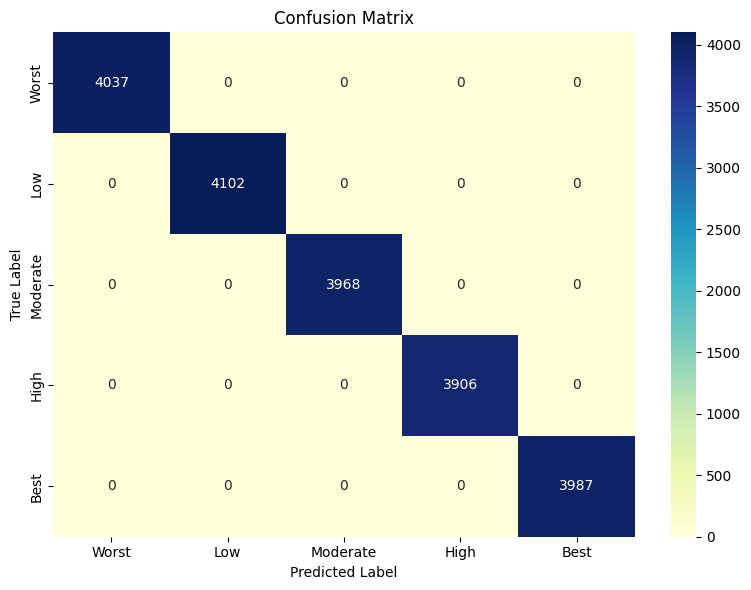

In [44]:
# evaluate on test set
label_y_test_pred_encoded = best_pipeline.predict(X_test)

# decode predictions back to original labels
y_test_pred = label_encoder.inverse_transform(label_y_test_pred_encoded)

# calculate metrics
cm = confusion_matrix(y_test, y_test_pred)  # use decoded versions
print(f"accuracy: {accuracy_score(y_test, y_test_pred)}")
print("\nclassification report:\n", classification_report(y_test, y_test_pred, target_names=class_names, zero_division=0))

# create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names,
            yticklabels=class_names)
plt.xticks(rotation=0)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## Saving Model & Preprocessing Objects

In [45]:
# create directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# save the best performing model
joblib.dump(best_pipeline, '../models/performance_prediction_model.pkl')

['../models/performance_prediction_model.pkl']

In [46]:
# create directory if it doesn't exist
os.makedirs('../preprocessors', exist_ok=True)

# save preprocessing objects
joblib.dump(label_encoder, '../preprocessors/label_encoder.pkl')

['../preprocessors/label_encoder.pkl']

In [47]:
# create directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# save feature info for inference
feature_info = {
    'categorical_cols': categorical_cols,
    'numeric_cols': numeric_cols,
    'onehot_cols': onehot_cols,
    'ordinal_cols': ordinal_cols,
    'all_features': X.columns.tolist()
}

joblib.dump(feature_info, '../data/processed/feature_info.pkl')

['../data/processed/feature_info.pkl']

This notebook is done by `La Wun Nannda`.